<img alt="Colaboratory logo" width="100%" src="http://www.caxambu.mg.gov.br/v2/wp-content/uploads/2020/05/WhatsApp-Image-2020-05-15-at-10.16.43.jpeg">

*by [George Vasconcelos](https://george-vasconcelos.webnode.com/)* 


# Panorama do COVID-19 no Brasil

Não é nosso propósito neste artigo tecer considerações sobre que é o COVID-19. Tampouco falaremos sobre protocolos de tratamento ou suposições sobre reinfecção. Existe muita gente boa debruçada sobre esse tema e inúmeras publicações de qualidade. 

Aqui com base nos dados, trataremos das seguintes questões:

* Existe correlação entre fatores sócio-econômicos e a mortalidade por COVID-19?
* Qual a tendência de mortos e infectados no Brasil? já estamos num platô ou ainda na curva ascendente?
* O isolamento social tem efeito na redução da mortalidade?

Para responder a essas questões, obtivemos dados do site [Our World in Data](https://ourworldindata.org/), uma publicação digital que mostra dados analíticos sobre diversos temas de interesse geral, na sessão dedicada ao COVID-19.



### Importando os dados do COVID-19

No site supracitado, buscamos o arquivo no formato `csv` contendo os dados soobre COVID. É importante destacar que os dados são alterados diariamente, portanto, cada vez que os códigos deste notebook forem processados, haverá alteração nos valores. 

Este artigo e suas análises refletem a realidade do dia 01/07/2020.

In [39]:
# importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# importar o dataset COVID-19 para um Data Frame
data_path = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(data_path)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [40]:
df.shape

(27381, 34)

### Dicionário de Variáveis

    * 0   iso_code                         Código de 3 letras referentes ao país 
    * 1   continent                        Continente da localização geográfica
    * 2   location                         Localização geográfica
    * 3   date                             Data da Observação 
    * 4   total_cases                      Total de Casos confirmados
    * 5   new_cases                        Novos casos confirmados
    * 6   total_deaths                     Mortes atribuídas ao COVID-19
    * 7   new_deaths                       Novas mortes atribuídas ao COVID-19
    * 8   total_cases_per_million          Total de casos confirmados a cada 1.000.000 de habitantes
    * 9   new_cases_per_million            Novos casos confirmados a cada 1.000.000 de habitantes
    * 10  total_deaths_per_million         Total de mortes confirmadas a cada 1.000.000 de habitantes
    * 11  new_deaths_per_million           Total de mortes confirmadas a cada 1.000.000 de habitantes
    * 12  total_tests                      Total de Testes de Covid-19 realizados
    * 13  new_tests                        Novos Testes de Covid-19 realizados
    * 14  total_tests_per_thousand         Total de Testes de Covid-19 realizados a cada 1.000 habitantes
    * 15  new_tests_per_thousand           Novos Testes de Covid-19 realizados a cada 1.000 habitantes
    * 16  new_tests_smoothed               Para países onde não há dados diários divulgados, considera para dados ausentes
                                           uma projeção da média de 7 dias de dados divulgados.
    * 17  new_tests_smoothed_per_thousand  Projeção anterior para cada 1.000 habitantes
    * 18  tests_units                      Unidade usada pelo país para relatar os dados de testes 
    * 19  stringency_index                 Índice de rigor de resposta governamental:
                                           composição baseada em 9 indicadores de resposta, incluindo fechamento de 
                                           escolas, escritórios, fronteiras, etc. numa escala de 0 a 100, sendo 100
                                           a resposta mais rigorosa.
    * 20  population                       População em 2020
    * 21  population_density               População dividida pela área em KM2
    * 22  median_age                       Idade média da população
    * 23  aged_65_older                    Parte da população acima de 65 anos
    * 24  aged_70_older                    Parte da população acima de 65 anos
    * 25  gdp_per_capita                   PIB per capita
    * 26  extreme_poverty                  Parte da população em situação de extrema pobreza
    * 27  cvd_death_rate                   Taxa de doenças cardíacas 
    * 28  diabetes_prevalence              Taxa de prevalência de diabetes (%)
    * 29  female_smokers                   taxa de mulheres fumantes
    * 30  male_smokers                     Taxa de homens fumantes
    * 31  handwashing_facilities           disponibilidade de estrututura para lavar as mãos
    * 32  hospital_beds_per_thousand       Leitos hospitalares a cada 1000 habitantes
    * 33  life_expectancy                  Expectativa de vida

## Análise da Qualidade dos Dados

Como vimos, são 34 variáveis neste dataset com cerca de vinte e sete mil registros, o que nos possibilita diversas linhas de investigação. Porém, antes precisamos avaliar a qualidade desses dados, ou seja, existência de valores ausentes, formatos de dados incorretos e outliers (valores atípicos)


In [41]:
#Quais os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27381 entries, 0 to 27380
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         27317 non-null  object 
 1   continent                        27133 non-null  object 
 2   location                         27381 non-null  object 
 3   date                             27381 non-null  object 
 4   total_cases                      27166 non-null  float64
 5   new_cases                        27166 non-null  float64
 6   total_deaths                     27166 non-null  float64
 7   new_deaths                       27166 non-null  float64
 8   total_cases_per_million          27102 non-null  float64
 9   new_cases_per_million            27102 non-null  float64
 10  total_deaths_per_million         27102 non-null  float64
 11  new_deaths_per_million           27102 non-null  float64
 12  total_tests       

Verificamos que:
* A coluna `date` consta como object;
As demais colunas estão no formato correto. Faremos então a conversão para o formato data (YYYY-MM-DD): 

In [42]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

**Em seguida, vamos verificar os dados ausentes:**

In [43]:
#Identifique a porcentagem de valores ausentes das colunas*
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

new_tests                          74.182828
new_tests_per_thousand             74.182828
total_tests_per_thousand           71.677441
total_tests                        71.677441
new_tests_smoothed_per_thousand    69.376575
new_tests_smoothed                 69.376575
tests_units                        67.115883
handwashing_facilities             59.176071
extreme_poverty                    40.341843
male_smokers                       28.494211
female_smokers                     27.654213
stringency_index                   19.926226
hospital_beds_per_thousand         17.413535
aged_65_older                      10.985720
gdp_per_capita                     10.730068
aged_70_older                      10.167634
median_age                          9.703809
cvd_death_rate                      9.594244
diabetes_prevalence                 6.654249
population_density                  4.375297
life_expectancy                     1.395128
new_deaths_per_million              1.018955
total_deat

## Lidando com os dados ausentes

Das 34 colunas, apenas 2 tem todos os dados. Para os dados faltantes, podemos excluí-los, preenchê-los ou desconsiderá-los. 

12 colunas tem menos de 1,5% das informações ausentes. Para este caso, vamos simplesmente excluir os dados:

temos 8 variáveis com mais de 50% dos dados ausentes, dos quais 7 se referem aos testes aplicados e um à instalações para lavagem das mãos, cuja análise pode ser substituída pelo PIB, mais completo.


    * new_tests                          74.18%
    * new_tests_per_thousand             74.18%
    * total_tests_per_thousand           71.67%
    * total_tests                        71.67%
    * new_tests_smoothed_per_thousand    69.37%
    * new_tests_smoothed                 69.37%
    * tests_units                        66.15%
    * handwashing_facilities             59.17%


O mesmo pode se aplicar à variável `extreme_poverty` e `hospital_beds_per_thousand`. Faremos a análise considerando o PIB. Assim, vamos excluir as referidas colunas de nosso dataset.

Não utilizaremos o percentual de fumantes em nosso estudo, pois além um razoável percentual de dados ausentes, não são o objeto de nossa análise.

In [44]:
#apagando os registros com dados ausentes <1,5%
df_novo = df.dropna(subset=['life_expectancy', 'new_deaths_per_million','total_deaths_per_million','new_cases_per_million','total_cases_per_million','continent'],axis=0)

In [45]:
#Apagando as colunas com alto percentual de ausências:
df_novo.drop(['male_smokers','female_smokers','hospital_beds_per_thousand','new_tests','new_tests_per_thousand','total_tests_per_thousand','total_tests','new_tests_smoothed_per_thousand','new_tests_smoothed','tests_units','handwashing_facilities','extreme_poverty'], axis=1, inplace=True)

C:\Users\georgev\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
#revisando os dados ausentes:
(df_novo.isnull().sum() / df_novo.shape[0]).sort_values(ascending=False)*100

stringency_index            18.778195
gdp_per_capita              10.018797
aged_65_older                9.868421
aged_70_older                8.981203
median_age                   8.552632
cvd_death_rate               8.417293
diabetes_prevalence          5.409774
population_density           3.477444
life_expectancy              0.000000
total_deaths                 0.000000
continent                    0.000000
location                     0.000000
date                         0.000000
total_cases                  0.000000
new_cases                    0.000000
total_deaths_per_million     0.000000
new_deaths                   0.000000
total_cases_per_million      0.000000
new_cases_per_million        0.000000
new_deaths_per_million       0.000000
population                   0.000000
iso_code                     0.000000
dtype: float64

Considerando um universo de cerca de 500.000 mortos (em 30/06/2020), entendemos que países com menos de 0,5% dos mortos não seriam estatisticamente relevantes, portanto iremos tirá-los do dataset.

In [47]:
#criando um dataset apenas com a data mais atual. OS números de mortes são cumulativos.
df_deaths = df_novo.loc[df_novo.date == '2020-06-30'].sort_values(by="total_deaths", ascending=False)

In [48]:
#excluindo os países com menos de 2.500 mortos:
df_deaths.loc[df_deaths.total_deaths > 2499].sort_values(by="total_deaths", ascending=False, inplace=True)
(df_deaths.isnull().sum() / df_deaths.shape[0]).sort_values(ascending=False)*100

C:\Users\georgev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


stringency_index            97.087379
gdp_per_capita              12.135922
aged_65_older               11.650485
aged_70_older               10.679612
cvd_death_rate              10.194175
median_age                  10.194175
diabetes_prevalence          6.796117
population_density           4.368932
life_expectancy              0.000000
total_deaths                 0.000000
continent                    0.000000
location                     0.000000
date                         0.000000
total_cases                  0.000000
new_cases                    0.000000
total_deaths_per_million     0.000000
new_deaths                   0.000000
total_cases_per_million      0.000000
new_cases_per_million        0.000000
new_deaths_per_million       0.000000
population                   0.000000
iso_code                     0.000000
dtype: float64

Diante desse novo cenário, a coluna `stringency_index` passa a ter pouca relevância. 

In [49]:
df_deaths.drop(['stringency_index'], axis=1, inplace=True)

In [50]:
(df_deaths.isnull().sum() / df_deaths.shape[0]).sort_values(ascending=False)*100

gdp_per_capita              12.135922
aged_65_older               11.650485
aged_70_older               10.679612
cvd_death_rate              10.194175
median_age                  10.194175
diabetes_prevalence          6.796117
population_density           4.368932
life_expectancy              0.000000
total_deaths                 0.000000
continent                    0.000000
location                     0.000000
date                         0.000000
total_cases                  0.000000
new_cases                    0.000000
total_deaths_per_million     0.000000
new_deaths                   0.000000
total_cases_per_million      0.000000
new_cases_per_million        0.000000
new_deaths_per_million       0.000000
population                   0.000000
iso_code                     0.000000
dtype: float64

## Análise Exploratória Inicial

Em que pese ainda termos uma quantidade razoável de dados ausentes, podemos prosseguir com uma análise exploratória dos dados:

### Correlação entre as Variáveis ## 

Buscaremos agora correlações entre o total de mortes e as variáveis existentes. Para isso, selecionamos as seguintes variáveis:

* total_deaths

E sua correlação com: 
* total_cases
* population
* population_density
* median_age
* aged_65_older
* aged_70_older
* gdp_per_capita
* cvd_death_rate
* diabetes_prevalence
* life_expectancy

Correlação significa que existe um impacto mútuo entre duas variáveis, ou seja, uma variável influencia na outra e vice-versa.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, iremos:

- Criar uma matriz de correlação;
- Gerar um heatmap a partir dessa matriz:

In [55]:
# criar uma matriz de correlação
corr = df_deaths[['total_deaths','total_cases',
       'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cvd_death_rate', 'diabetes_prevalence', 'life_expectancy']].corr()

display(corr)

,total_deaths,total_cases,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,life_expectancy
total_deaths,1.000000,0.929300,0.263198,-0.031623,0.184688,0.206061,0.210244,0.175475,-0.185965,0.005596,0.149964
total_cases,0.929300,1.000000,0.323935,-0.027515,0.131573,0.117960,0.116053,0.150483,-0.109350,0.047298,0.097663
population,0.263198,0.323935,1.000000,-0.019371,0.026484,-0.009461,-0.019748,-0.057781,0.010581,0.022217,-0.025988
population_density,-0.031623,-0.027515,-0.019371,1.000000,0.137794,0.062437,0.036489,0.296430,-0.178219,0.017322,0.198584
median_age,0.184688,0.131573,0.026484,0.137794,1.000000,0.915003,0.899808,0.643017,-0.323927,0.203994,0.848525
aged_65_older,0.206061,0.117960,-0.009461,0.062437,0.915003,1.000000,0.994348,0.502698,-0.323528,-0.011047,0.733261
aged_70_older,0.210244,0.116053,-0.019748,0.036489,0.899808,0.994348,1.000000,0.494987,-0.339225,-0.044884,0.720732
gdp_per_capita,0.175475,0.150483,-0.057781,0.296430,0.643017,0.502698,0.494987,1.000000,-0.468447,0.264095,0.684891
cvd_death_rate,-0.185965,-0.109350,0.010581,-0.178219,-0.323927,-0.323528,-0.339225,-0.468447,1.000000,0.015569,-0.481885
diabetes_prevalence,0.005596,0.047298,0.022217,0.017322,0.203994,-0.011047,-0.044884,0.264095,0.015569,1.000000,0.314916


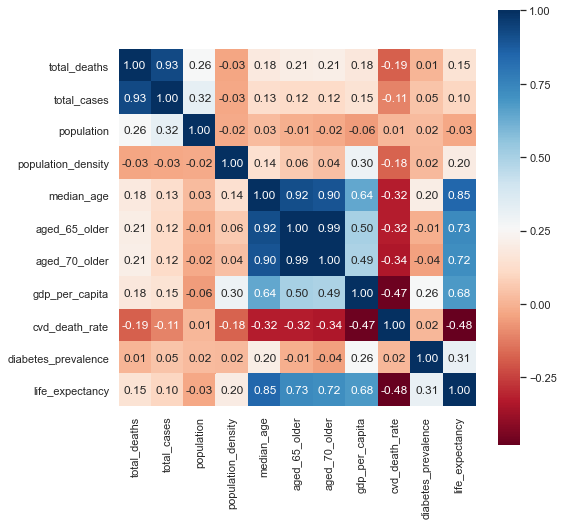

In [58]:
fig, ax = plt.subplots(figsize=(8,8))        

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

O **coeficiente de correlação de Pearson (r)**, também chamado de correlação linear ou r de Pearson, é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre -1 e 1, onde a correlação que se aproxima de 1, indica um aumento no valor de uma variável quando a outra também aumenta, enquanto que ao se aproximar de -1, quando o valor de uma variável aumenta o da outra diminui.

Em qualquer dos casos, a correlação existe.
Um coeficiente de correlação próximo de zero indica que não há relação entre as duas variáveis, e quanto mais eles se aproximam de 1 ou -1, mais forte é a relação.

Observando o gráfico acima, vemos a falta de uniformidade nas relações com o COVID. Mesmo em variáveis como média de idade ou prevalência de diabetes ou doenças cardiácas,  não conseguimos estabelecer uma correlação elevada. O caso de doenças cardíacas é mais emblemático, porque mostrou uma correlação negativa. 

A maior correlação, como era esperado, é entre o número de casos e o número de óbitos, ou seja, quanto mais casos, mais óbitos, o que não acrescenta nada em termos de insights.

### Análise Exploratória

Veremos em seguida alguns gráficos com o panorama global da COVID no mundo:

Inicialmente, veremos um gráfico com a evolução dos casos no mundo.

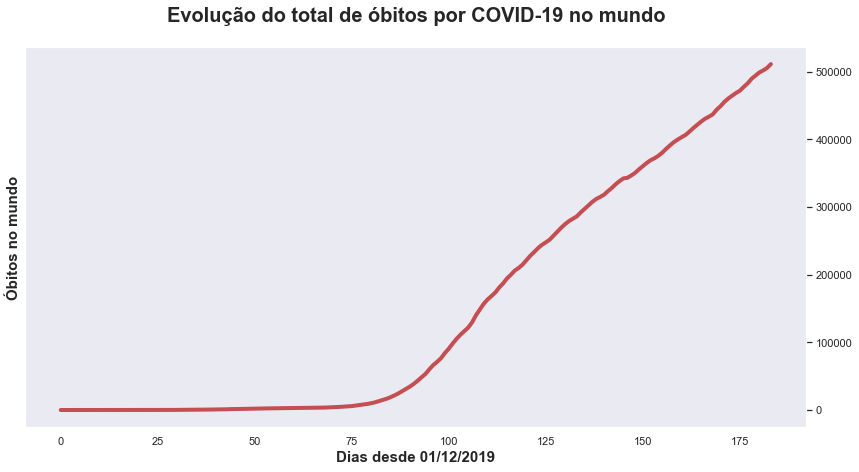

In [213]:
fig, (ax) = plt.subplots(figsize = (14,7))

df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(ax=ax,lw=4,c='r')


ax.set_title("Evolução do total de óbitos por COVID-19 no mundo", pad=25, fontsize=20, weight='bold')
ax.set_xlabel('Dias desde 01/12/2019', fontsize=15, weight='bold')
ax.set_ylabel('Óbitos no mundo', fontsize=15, weight='bold')

ax.yaxis.tick_right()
ax.grid(False)
plt.show()


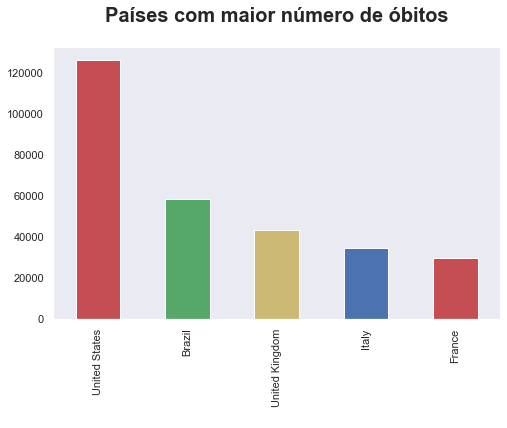

In [182]:
#Plotar um gráfico de barras para os 5 países com mais mortes
#* Plotar um gráfico de barras para os 5 países com mais mortes
#    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
#    * `ax.bar('location', 'total_deaths', data=total_deaths)`

fig, ax=plt.subplots(figsize=(8,5))

barras = df_deaths.loc[df_deaths.date == '2020-06-30', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:5]

barras.plot(x='location',kind='bar', ax=ax,color=('r', 'g', 'y','b'))

ax.set_title("Países com maior número de óbitos", pad=25, fontsize=20, weight='bold')
ax.set_xlabel(' ')


ax.grid(False)
ax.get_legend().remove()

plt.show()



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


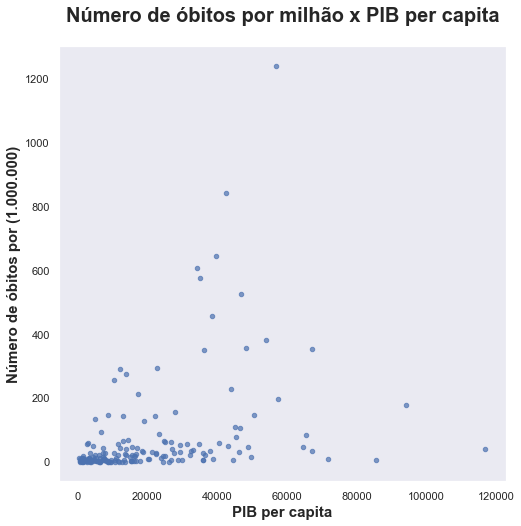

In [241]:
fig, ax=plt.subplots(figsize=(8,8))

df_deaths.plot.scatter(x='gdp_per_capita',y='total_deaths_per_million', ax=ax, alpha=0.7)




ax.set_title("Número de óbitos por milhão x PIB per capita", pad=25, fontsize=20, weight='bold')
ax.set_xlabel('PIB per capita', fontsize=15, weight='bold')
ax.set_ylabel('Número de óbitos por (1.000.000)', fontsize=15, weight='bold')

ax.grid(False)
plt.show()

O gráfico acima comprova que o fato do país ter elevado PIB per capita não diminui o impacto da COVID e que a grande concentração se encontra no vértice baixo PIB x Baixo número de óbitos por milhão.

### Análise Exploratória para o Brasil

Mas, Qual a tendência de mortos e infectados no Brasil? já estamos num platô ou ainda na curva ascendente?

Embora tenha tido seu primeiro caso em 18/03/2020, 108 dias após o primeiro registro no mundo, o brasil se encontra em segundo lugar em óbitos, considerando valores absolutos. 

In [274]:
#Identificar quando foi registrada a primeira morte no Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()
df_brasil.loc[df_brasil.total_deaths == 1, "date"].reset_index(drop=True)

0   2020-03-18
Name: date, dtype: datetime64[ns]

In [275]:
#Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
from datetime import datetime

# Data final
d2 = datetime.strptime('2020-03-18', '%Y-%m-%d')

# Data inicial
d1 = datetime.strptime('2019-12-01', '%Y-%m-%d')

# Realizamos o calculo da quantidade de dias
quantidade_dias = abs((d2 - d1).days)

print(quantidade_dias)

108


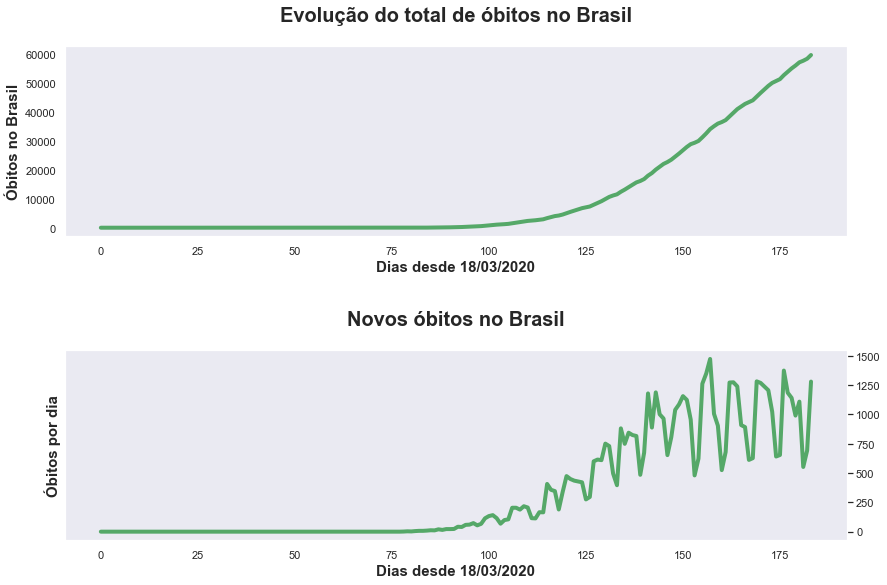

In [297]:
fig, (ax,ax1) = plt.subplots(nrows = 2, figsize = (14,7))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.6, wspace=0.4)

df.loc[df.location == "Brazil", "total_deaths"].reset_index(drop=True).plot(ax=ax,lw=4,c='g')

ax.set_title("Evolução do total de óbitos no Brasil", pad=25, fontsize=20, weight='bold')
ax.set_xlabel('Dias desde 18/03/2020', fontsize=15, weight='bold')
ax.set_ylabel('Óbitos no Brasil', fontsize=15, weight='bold')

ax.grid(False)
#############################################################################################################
df.loc[df.location == "Brazil", "new_deaths"].reset_index(drop=True).plot(ax=ax1,lw=4,c='g')

ax1.set_title("Novos óbitos no Brasil", pad=25, fontsize=20, weight='bold')
ax1.set_xlabel('Dias desde 18/03/2020', fontsize=15, weight='bold')
ax1.set_ylabel('Óbitos por dia', fontsize=15, weight='bold')

ax1.grid(False)

ax1.yaxis.tick_right()
plt.show()


O gráfico é autoexplicativo: Não há sinais de redução no número de óbitos. A oscilação nos números diários mostra muito mais uma irregularidade nas notificações do que uma tendência, mas, numa visão otimista, um indicativo de platô num patamar elevado.

## Conclusão

Afinal, o isolamento social tem efeito na redução da mortalidade?

Vimos a falta de correlação entre o número de mortos e diversos fatores sócio-econômicos. Se é assim, qual seria o diferencial entre países com baixa letalidade e países como os top 5 mostrados anteriormente? 

Para responder a essas perguntas, vamos comparar 3 países que adotaram posturas diferentes através de gráficos:
Números absolutos de óbitos e um cálculo por milhão de habitantes: Brasil, Suécia e Canadá. 

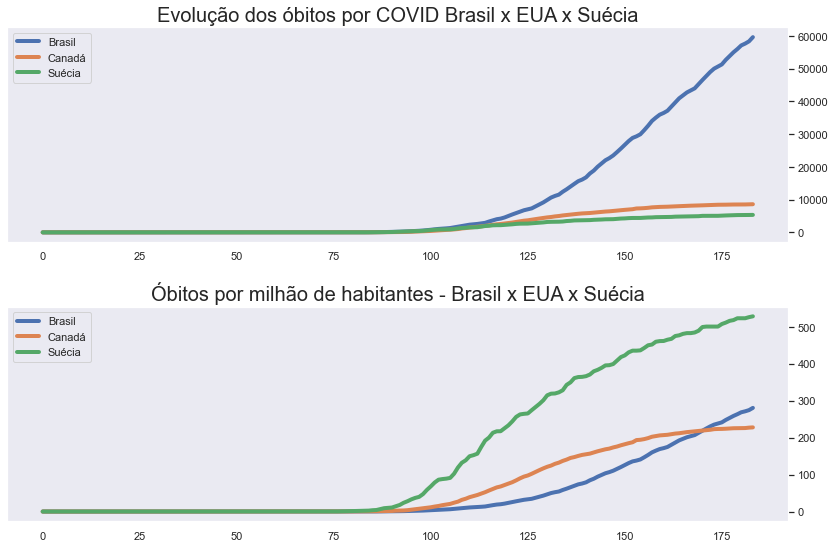

In [283]:
fig, (ax1,ax2) = plt.subplots(figsize = (14,7), nrows=2)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.4)

y=df.loc[df.location == "Brazil", "total_deaths"].reset_index(drop=True)
z=df.loc[df.location == "Canada", "total_deaths"].reset_index(drop=True)
s=df.loc[df.location == "Sweden", "total_deaths"].reset_index(drop=True)

ax1.plot(y,lw=4)
ax1.plot(z,lw=4)
ax1.plot(s,lw=4)

ax1.set_title("Evolução dos óbitos por COVID Brasil x Canadá x Suécia", fontsize=20)

ax1.yaxis.tick_right()
ax1.grid(False)

ax1.legend(['Brasil', 'Canadá', 'Suécia'])

############################################################33
a=df.loc[df.location == "Brazil", "total_deaths_per_million"].reset_index(drop=True)
b=df.loc[df.location == "Canada", "total_deaths_per_million"].reset_index(drop=True)
c=df.loc[df.location == "Sweden", "total_deaths_per_million"].reset_index(drop=True)

ax2.plot(a,lw=4)
ax2.plot(b,lw=4)
ax2.plot(c,lw=4)

ax2.set_title("Óbitos por milhão de habitantes - Brasil x Canadá x Suécia", fontsize=20)

ax2.yaxis.tick_right()
ax2.grid(False)

ax2.legend(['Brasil', 'Canadá', 'Suécia'])

plt.show()

Embora em números absolutos o Brasil seja disparado o que tem maior número de óbitos, o que numa primeira análise levaria ao entendimento que a Suécia obteve os melhores resultados, o panorama se inverte quendo efetuamos o cálculo por milhão de habitantes. 

A Suécia adotou o **isolamento vertical**, onde o governo contou com a adesão da população no isolamento voluntário, o que levou à redução de 70% na circulação de pessoas.

No Brasil, o embate político-ideológico provocou um desencontro entre o governo federal e os governos estaduais, levando a diferentes níveis de isolamento, em diferentes datas, mas seguindo as orientações da OMS, adotou o **isolamento horizontal gradual** chegando a períodos de Lockdown em alguns estados.

O Canadá, por sua vez, adotou o **isolamento horizontal**. O isolamento teve início em de 15 de março e já em 18 de março, houve a a determinação do governo para a suspensão das atividades econômicas não essenciais (supermercados, farmácias e alguns serviços públicos). Milhares de canadenses foram dispensados de seus trabalhos devido a essa determinação. 

Os gráficos mostram os resultados dessas políticas se que sobressaem a todos os aspectos avaliados neste artigo. Mesmo com a tendência de alta nos óbitos, o Brasil inicia sua política de reabertura. 

O tempo dirá se foi uma decisão acertada.